<a href="https://colab.research.google.com/github/Remmalapudijaswanthi/Students-Marks-Prediction/blob/main/Students_Mark_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gradio


That line installs the Gradio library into your Google Colab environment.
 Gradio lets you quickly build an interactive GUI (web app) for your machine learning
model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import gradio as gr


 import numpy as np → Numpy helps with math & number calculations.
 import pandas as pd → Pandas helps to create and manage tables (datasets).
 import matplotlib.pyplot as plt → Used for making graphs and charts.

In [3]:
np.random.seed(42)
data = {
 "RollNo": np.arange(1, 51),
 "Mid1": np.random.randint(20, 71, 50), # marks between 20–70
 "Mid2": np.random.randint(20, 71, 50),
}
df = pd.DataFrame(data)
# Semester marks (target) – assume some relation with mid1 & mid2
df["Semester"] = (0.4*df["Mid1"] + 0.5*df["Mid2"] + np.random.randint(-5, 6,
50)).clip(0,70).astype(int)
df.head()


,RollNo,Mid1,Mid2,Semester
0,1,58,28,40
1,2,48,45,42
2,3,34,21,27
3,4,62,39,46
4,5,27,47,29


In [4]:
X = df[["Mid1", "Mid2"]]
y = df["Semester"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.190287997651329
R² Score: 0.9331298881722647


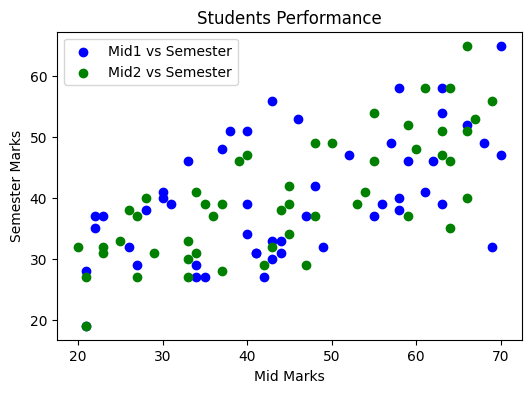

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df["Mid1"], df["Semester"], color="blue", label="Mid1 vs Semester")
plt.scatter(df["Mid2"], df["Semester"], color="green", label="Mid2 vs Semester")
plt.xlabel("Mid Marks")
plt.ylabel("Semester Marks")
plt.title("Students Performance")
plt.legend()
plt.show()

In [14]:
image_url = "/content/Adikavi_Nannaya_University_logo.png"
def predict_marks(mid1, mid2):
 pred = model.predict([[mid1, mid2]])[0]
 return f"ᨾᨿᩀᩁᩂ Predicted Semester Marks: {int(pred)} / 70"
with gr.Blocks(theme=gr.themes.Soft()) as demo:
 with gr.Row():
  with gr.Column(scale=1):
   gr.Image(value=image_url, label="Student Marks Prediction", show_label=False,
show_download_button=False)
  with gr.Column(scale=2):
   gr.Markdown("<h2 style='color: purple; text-align:center;'> Student Marks Prediction Model</h2>")
   mid1 = gr.Slider(0, 70, value=35, label="Enter Mid1 Marks", interactive=True)
   mid2 = gr.Slider(0, 70, value=35, label="Enter Mid2 Marks", interactive=True)
   output = gr.Textbox(label="Result", interactive=False)
   predict_btn = gr.Button("Predict Semester Marks ", variant="primary")
   predict_btn.click(predict_marks, inputs=[mid1, mid2], outputs=output)
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86e001c76ef1eb971a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
